In [55]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e598cc0f480d4ee3944da5fd4d0e3eef',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2026-01-23T06:55:01.213Z', 'error_code': 0, 'error_message': None, 'elapsed': 38, 'credit_count': 1, 'notice': None, 'total_count': 8939}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12524, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [56]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [57]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12524,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.997961e+07,1.997961e+07,False,1.787469e+12,NaN,1,NaN,NaN,None,2026-01-23T06:53:00.000Z,89464.650835,3.477572e+10,-33.5074,-0.003318,-0.702886,-6.491858,2.910239,2.993999,-19.708694,1.787469e+12,59.1802,1.878758e+12,None,2026-01-23T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:25:02.286324
1,1027,Ethereum,ETH,ethereum,11442,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206945e+08,1.206945e+08,True,3.551688e+11,NaN,2,NaN,NaN,None,2026-01-23T06:53:00.000Z,2942.709504,2.160062e+10,-36.1272,-0.725228,-2.534241,-11.170969,0.415825,3.918485,-25.146332,3.551688e+11,11.7591,3.551688e+11,None,2026-01-23T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:25:02.286324
2,825,Tether USDt,USDT,tether,167965,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.869173e+11,1.894866e+11,True,1.892326e+11,NaN,3,NaN,NaN,None,2026-01-23T06:53:00.000Z,0.998660,8.224466e+10,-24.8852,-0.004202,-0.039841,-0.084087,-0.063171,-0.100090,-0.150223,1.866668e+11,6.1802,1.892326e+11,None,2026-01-23T06:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-23 12:25:02.286324
3,1839,BNB,BNB,bnb,3098,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.363607e+08,1.363606e+08,1.363606e+08,False,1.213746e+11,NaN,4,NaN,NaN,None,2026-01-23T06:54:00.000Z,890.099795,1.867642e+09,-41.2229,0.043161,-0.020827,-4.815801,6.241290,4.437200,-20.189972,1.213746e+11,4.0185,1.213746e+11,None,2026-01-23T06:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:25:02.286324
4,52,XRP,XRP,xrp,1784,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.078950e+10,9.998573e+10,False,1.908794e+11,NaN,5,NaN,NaN,None,2026-01-23T06:53:00.000Z,1.909067,2.245361e+09,-48.1243,0.067053,-2.369854,-7.926823,3.220496,-7.663032,-24.850899,1.160512e+11,3.8423,1.909067e+11,None,2026-01-23T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:25:02.286324
5,3408,USDC,USDC,usd-coin,36690,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.361165e+10,7.361165e+10,False,7.358155e+10,NaN,6,6.090122e+10,6.087632e+10,None,2026-01-23T06:53:00.000Z,0.999591,1.411939e+10,-22.0655,0.009638,-0.019302,-0.012141,-0.032095,-0.039778,-0.033766,7.358155e+10,2.4362,7.358155e+10,None,2026-01-23T06:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-23 12:25:02.286324
6,5426,Solana,SOL,solana,1074,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.658275e+08,6.189077e+08,True,7.923111e+10,NaN,7,5.252369e+08,6.723959e+10,None,2026-01-23T06:53:00.000Z,128.017643,3.261003e+09,-36.1536,-0.287574,-1.681235,-10.628262,5.468714,-2.184892,-34.093670,7.243590e+10,2.3982,7.923111e+10,None,2026-01-23T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:25:02.286324
7,1958,TRON,TRX,tron,1281,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.471155e+10,9.471155e+10,True,2.921055e+10,NaN,8,9.466789e+10,2.919709e+10,None,2026-01-23T06:53:00.000Z,0.308416,7.192506e+08,3.0378,-0.113218,2.692812,-0.473906,9.338120,11.412427,4.394464,2.921056e+10,0.9671,2.921055e+10,None,202

In [58]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e598cc0f480d4ee3944da5fd4d0e3eef',
    }
    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

    if not os.path.isfile(r'C:\desktop files\Projects\API.csv'):
        df.to_csv(r'C:\desktop files\Projects\API.csv', header = 'column_names')
    else :
        df.to_csv(r'C:\desktop files\Projects\API.csv', mode = 'a', header = False )
        
    

In [59]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for a minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [60]:
df3 = pd.read_csv(r'C:\desktop files\Projects\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12524,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.997961e+07,1.997961e+07,False,1.787469e+12,NaN,1,NaN,NaN,NaN,2026-01-23T06:53:00.000Z,89464.650835,3.477572e+10,-33.5074,-0.003318,-0.702886,-6.491858,2.910239,2.993999,-19.708694,1.787469e+12,59.1802,1.878758e+12,NaN,2026-01-23T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:25:05.349133
1,1,1027,Ethereum,ETH,ethereum,11442,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206945e+08,1.206945e+08,True,3.551688e+11,NaN,2,NaN,NaN,NaN,2026-01-23T06:53:00.000Z,2942.709504,2.160062e+10,-36.1272,-0.725228,-2.534241,-11.170969,0.415825,3.918485,-25.146332,3.551688e+11,11.7591,3.551688e+11,NaN,2026-01-23T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:25:05.349133
2,2,825,Tether USDt,USDT,tether,167965,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.869173e+11,1.894866e+11,True,1.892326e+11,NaN,3,NaN,NaN,NaN,2026-01-23T06:53:00.000Z,0.998660,8.224466e+10,-24.8852,-0.004202,-0.039841,-0.084087,-0.063171,-0.100090,-0.150223,1.866668e+11,6.1802,1.892326e+11,NaN,2026-01-23T06:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-23 12:25:05.349133
3,3,1839,BNB,BNB,bnb,3098,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.363607e+08,1.363606e+08,1.363606e+08,False,1.213746e+11,NaN,4,NaN,NaN,NaN,2026-01-23T06:54:00.000Z,890.099795,1.867642e+09,-41.2229,0.043161,-0.020827,-4.815801,6.241290,4.437200,-20.189972,1.213746e+11,4.0185,1.213746e+11,NaN,2026-01-23T06:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:25:05.349133
4,4,52,XRP,XRP,xrp,1784,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.078950e+10,9.998573e+10,False,1.908794e+11,NaN,5,NaN,NaN,NaN,2026-01-23T06:53:00.000Z,1.909067,2.245361e+09,-48.1243,0.067053,-2.369854,-7.926823,3.220496,-7.663032,-24.850899,1.160512e+11,3.8423,1.909067e+11,NaN,2026-01-23T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:25:05.349133
5,5,3408,USDC,USDC,usd-coin,36690,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.361165e+10,7.361165e+10,False,7.358155e+10,NaN,6,6.090122e+10,6.087632e+10,NaN,2026-01-23T06:53:00.000Z,0.999591,1.411939e+10,-22.0655,0.009638,-0.019302,-0.012141,-0.032095,-0.039778,-0.033766,7.358155e+10,2.4362,7.358155e+10,NaN,2026-01-23T06:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-23 12:25:05.349133
6,6,5426,Solana,SOL,solana,1074,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.658275e+08,6.189077e+08,True,7.923111e+10,NaN,7,5.252369e+08,6.723959e+10,NaN,2026-01-23T06:53:00.000Z,128.017643,3.261003e+09,-36.1536,-0.287574,-1.681235,-10.628262,5.468714,-2.184892,-34.093670,7.243590e+10,2.3982,7.923111e+10,NaN,2026-01-23T06:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:25:05.349133
7,7,1958,TRON,TRX,tron,1281,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.471155e+10,9.471155e+10,True,2.921055e+10,NaN,8,9.466789e+10,2.919709e+10,NaN,2026-01-23T06:53:00.000Z,0.308416,7.192506e+08,3.0378,-0.113218,2.692812,-0.473906,9.338120,11.412427,4.394464,2.921056e+10,0.9671,2.921055e

In [61]:
pd.set_option('display.float_format',lambda x : '%.5f' % x)

In [62]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12524,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19979612.00000,19979612.00000,False,1786225197722.51001,NaN,1,NaN,NaN,None,2026-01-23T06:57:00.000Z,89402.39669,34981391599.36967,-32.98780,-0.01171,-0.77343,-6.58953,2.84276,2.85524,-19.74978,1786225197722.51318,59.13900,1877450330475.53003,None,2026-01-23T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:29:09.459807
1,1027,Ethereum,ETH,ethereum,11442,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120694468.89581,120694468.89581,True,354316796255.12000,NaN,2,NaN,NaN,None,2026-01-23T06:57:00.000Z,2935.65065,21353757553.58339,-37.96730,-0.93085,-2.69699,-11.40217,0.19737,3.43992,-25.31661,354316796255.11902,11.73090,354316796255.12000,None,2026-01-23T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:29:09.459807
2,825,Tether USDt,USDT,tether,167965,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,186917302715.80444,189486597068.57690,True,189237543821.07999,NaN,3,NaN,NaN,None,2026-01-23T06:57:00.000Z,0.99869,82166717798.85905,-25.40900,-0.01296,-0.03827,-0.09458,-0.04729,-0.08634,-0.15722,186671626441.20673,6.18040,189237543821.07999,None,2026-01-23T06:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-01-23 12:29:09.459807
3,1839,BNB,BNB,bnb,3098,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",136360650.32000,136360648.32000,136360648.32000,False,121317532274.57001,NaN,4,NaN,NaN,None,2026-01-23T06:58:00.000Z,889.68140,1870012500.08901,-40.74890,-0.01240,-0.02856,-4.86080,6.18311,4.39775,-20.19700,121317532274.57111,4.02100,121317534053.92999,None,2026-01-23T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:29:09.459807
4,52,XRP,XRP,xrp,1784,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60789498738.00000,99985727631.00000,False,190814964006.07999,NaN,5,NaN,NaN,None,2026-01-23T06:57:00.000Z,1.90842,2243855020.41153,-48.15160,0.09529,-2.29421,-7.91539,3.21158,-7.80975,-24.86306,116012017799.65540,3.84100,190842201709.31000,None,2026-01-23T06:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:29:09.459807
5,3408,USDC,USDC,usd-coin,36690,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,73611649961.01012,73611649961.01012,False,73581728368.53999,NaN,6,60901219650.23000,60876464581.21289,None,2026-01-23T06:57:00.000Z,0.99959,14196746359.33626,-21.81900,-0.01246,-0.03370,-0.02636,-0.01786,-0.01595,-0.03289,73581728368.54097,2.43620,73581728368.53999,None,2026-01-23T06:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-01-23 12:29:09.459807
6,5426,Solana,SOL,solana,1074,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,565827495.34609,618907744.63835,True,78997490530.10001,NaN,7,525236893.30000,67041327021.63697,None,2026-01-23T06:58:00.000Z,127.64017,3277956693.43910,-35.81540,-0.57361,-1.96961,-10.91296,5.11738,-2.59302,-34.29725,72222318419.02350,2.39380,78997490530.10001,None,2026-01-23T06:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-01-23 12:29:09.459807
7,1958,TRON,TRX,tron,1281,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,94711548607.77277,94

In [64]:
df4 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [65]:
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.01171,-0.77343,-6.58953,2.84276,2.85524,-19.74978
Ethereum,-0.93085,-2.69699,-11.40217,0.19737,3.43992,-25.31661
Tether USDt,-0.01296,-0.03827,-0.09458,-0.04729,-0.08634,-0.15722
BNB,-0.01240,-0.02856,-4.86080,6.18311,4.39775,-20.19700
XRP,0.09529,-2.29421,-7.91539,3.21158,-7.80975,-24.86306
USDC,-0.01246,-0.03370,-0.02636,-0.01786,-0.01595,-0.03289
Solana,-0.57361,-1.96961,-10.91296,5.11738,-2.59302,-34.29725
TRON,-0.20832,2.71437,-0.41972,9.24412,11.30524,4.31048
Dogecoin,0.00429,-1.22239,-10.76645,-1.58669,-14.58749,-37.02643


In [70]:
df5 = df4.stack()
df5

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.01171
              quote.USD.percent_change_24h    -0.77343
              quote.USD.percent_change_7d     -6.58953
              quote.USD.percent_change_30d     2.84276
              quote.USD.percent_change_60d     2.85524
              quote.USD.percent_change_90d   -19.74978
Ethereum      quote.USD.percent_change_1h     -0.93085
              quote.USD.percent_change_24h    -2.69699
              quote.USD.percent_change_7d    -11.40217
              quote.USD.percent_change_30d     0.19737
              quote.USD.percent_change_60d     3.43992
              quote.USD.percent_change_90d   -25.31661
Tether USDt   quote.USD.percent_change_1h     -0.01296
              quote.USD.percent_change_24h    -0.03827
              quote.USD.percent_change_7d     -0.09458
              quote.USD.percent_change_30d    -0.04729
              quote.USD.percent_change_60d    -0.08634
              quote.US

In [71]:
type(df4)


pandas.core.frame.DataFrame

In [72]:
type(df5)

pandas.core.series.Series

In [73]:
df6= df5.to_frame(name = 'values')
df6

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.01171
             quote.USD.percent_change_24h  -0.77343
             quote.USD.percent_change_7d   -6.58953
             quote.USD.percent_change_30d   2.84276
             quote.USD.percent_change_60d   2.85524
             quote.USD.percent_change_90d -19.74978
Ethereum     quote.USD.percent_change_1h   -0.93085
             quote.USD.percent_change_24h  -2.69699
             quote.USD.percent_change_7d  -11.40217
             quote.USD.percent_change_30d   0.19737
             quote.USD.percent_change_60d   3.43992
             quote.USD.percent_change_90d -25.31661
Tether USDt  quote.USD.percent_change_1h   -0.01296
             quote.USD.percent_change_24h  -0.03827
             quote.USD.percent_change_7d   -0.09458
             quote.USD.percent_change_30d  -0.04729
             quote.USD.percent_change_60d  -0.08634
             quote.USD.percent_change_90d  -0.15722
BNB          quote.USD.percent_change_1h   -0.01240
             quote.USD.percent_change_24h  -0.02856
             quote.USD.percent_change_7d   -4.86080
             quote.USD.percent_change_30d   6.18311
             quote.USD.percent_change_60d   4.39775
             quote.USD.percent_change_90d -20.19700
XRP          quote.USD.percent_change_1h    0.09529
             quote.USD.percent_change_24h  -2.29421
             quote.USD.percent_change_7d   -7.91539
             quote.USD.percent_change_30d   3.21158
             quote.USD.percent_change_60d  -7.80975
             quote.USD.percent_change_90d -24.86306
USDC         quote.USD.percent_change_1h   -0.01246
             quote.USD.percent_change_24h  -0.03370
             quote.USD.percent_change_7d   -0.02636
             quote.USD.percent_change_30d  -0.01786
             quote.USD.percent_change_60d  -0.01595
             quote.USD.percent_change_90d  -0.03289
Solana       quote.USD.percent_change_1h   -0.57361
             quote.USD.percent_change_24h  -1.96961
             quote.USD.percent_change_7d  -10.91296
             quote.USD.percent_change_30d   5.11738
             quote.USD.percent_change_60d  -2.59302
             quote.USD.percent_change_90d -34.29725
TRON         quote.USD.percent_change_1h   -0.20832
             quote.USD.percent_change_24h   2.71437
             quote.USD.percent_change_7d   -0.41972
             quote.USD.percent_change_30d   9.24412
             quote.USD.percent_change_60d  11.30524
             quote.USD.percent_change_90d   4.31048
Dogecoin     quote.USD.percent_change_1h    0.00429
             quote.USD.percent_change_24h  -1.22239
             quote.USD.percent_change_7d  -10.76645
             quote.USD.percent_change_30d  -1.58669
             quote.USD.percent_change_60d -14.58749
             quote.USD.percent_change_90d -37.02643
Cardano      quote.USD.percent_change_1h    0.05032
             quote.USD.percent_change_24h  -1.39942
             quote.USD.percent_change_7d   -8.51426
             quote.USD.percent_change_30d   1.04688
             quote.USD.percent_change_60d -12.75472
             quote.USD.percent_change_90d -44.72598
Bitcoin Cash quote.USD.percent_change_1h    0.14124
             quote.USD.percent_change_24h   0.13748
             quote.USD.percent_change_7d   -0.63820
             quote.USD.percent_change_30d   4.14125
             quote.USD.percent_change_60d   9.59244
             quote.USD.percent_change_90d  17.04762
Monero       quote.USD.percent_change_1h    1.31116
             quote.USD.percent_change_24h   4.36661
             quote.USD.percent_change_7d  -21.91872
             quote.USD.percent_change_30d  24.19984
             quote.USD.percent_change_60d  38.70707
             quote.USD.percent_change_90d  62.33575
Chainlink    quote.USD.percent_change_1h   -0.37230
             quote.USD.percent_change_24h  -1.54479
             quote.USD.percent_change_7d  -11.04733
             quote.USD.percent_change_30d

In [87]:
df6.count()

values    90
dtype: int64

In [89]:
index = pd.Index(range(90))
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01171
1,Bitcoin,quote.USD.percent_change_24h,-0.77343
2,Bitcoin,quote.USD.percent_change_7d,-6.58953
3,Bitcoin,quote.USD.percent_change_30d,2.84276
4,Bitcoin,quote.USD.percent_change_60d,2.85524
5,Bitcoin,quote.USD.percent_change_90d,-19.74978
6,Ethereum,quote.USD.percent_change_1h,-0.93085
7,Ethereum,quote.USD.percent_change_24h,-2.69699
8,Ethereum,quote.USD.percent_change_7d,-11.40217
9,Ethereum,quote.USD.percent_change_30d,0.19737


In [91]:
df8 = df7.rename(columns = {'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.01171
1,Bitcoin,quote.USD.percent_change_24h,-0.77343
2,Bitcoin,quote.USD.percent_change_7d,-6.58953
3,Bitcoin,quote.USD.percent_change_30d,2.84276
4,Bitcoin,quote.USD.percent_change_60d,2.85524
5,Bitcoin,quote.USD.percent_change_90d,-19.74978
6,Ethereum,quote.USD.percent_change_1h,-0.93085
7,Ethereum,quote.USD.percent_change_24h,-2.69699
8,Ethereum,quote.USD.percent_change_7d,-11.40217
9,Ethereum,quote.USD.percent_change_30d,0.19737


In [99]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_24h'],['24h'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_7d'],['7d'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_30d'],['30d'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_60d'],['60d'])
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_90d'],['90d'])
df8


,name,percent_change,values
0,Bitcoin,1h,-0.01171
1,Bitcoin,24h,-0.77343
2,Bitcoin,7d,-6.58953
3,Bitcoin,30d,2.84276
4,Bitcoin,60d,2.85524
5,Bitcoin,90d,-19.74978
6,Ethereum,1h,-0.93085
7,Ethereum,24h,-2.69699
8,Ethereum,7d,-11.40217
9,Ethereum,30d,0.19737


In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

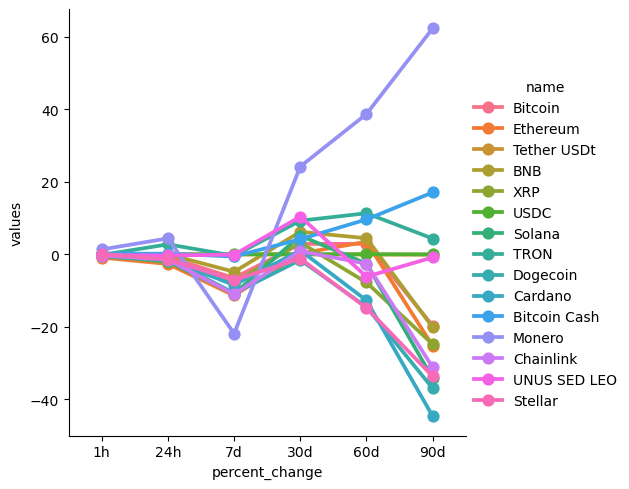

In [102]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df8, kind = 'point')